In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [207]:
# pdata = pd.read_csv('AirPassengers.csv')
# # data.head()
# #data.dtypes
# pdata.info(memory_usage='deep')
#data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 10.2 KB


In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv',parse_dates=['Month'],index_col='Month',date_parser=dateparse)
data.head()
#data.describe()
#data.info(memory_usage='deep')

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [5]:
data.index
#data.info(memory_usage='deep')

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
data['1949':'1950']

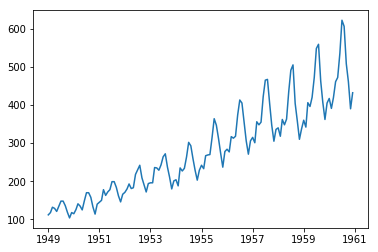

In [3]:
plt.plot(data)

In [33]:
from statsmodels.tsa.stattools import adfuller

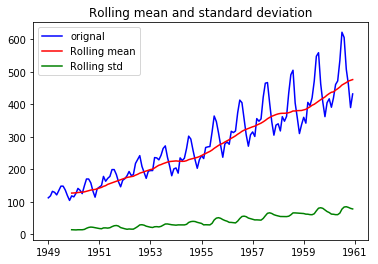

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical value (5%)             -2.884042
Critical value (1%)             -3.481682
Critical value (10%)            -2.578770
dtype: float64


In [52]:
# rolmean = pd.rolling_mean(data, window=12)
def test_stationary(data):
    rolmean = data.rolling(12).mean()
    rolstd = data.rolling(12).std()


    orignal = plt.plot(data,color='blue',label='orignal')
    mean = plt.plot(rolmean,color='red',label='Rolling mean')
    std = plt.plot(rolstd,color='green',label='Rolling std')
    plt.legend()
    plt.title('Rolling mean and standard deviation')
    plt.show()

    #df test
    dftest = adfuller(data.iloc[:,0].values,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    dfoutput    

    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value

    print(dfoutput)

test_stationary(data)

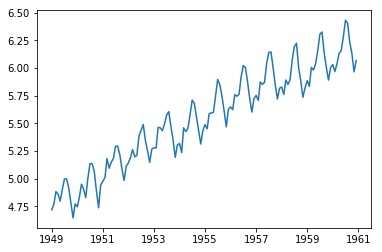

In [45]:
ts_log = np.log(data)
plt.plot(ts_log)
#ts_log

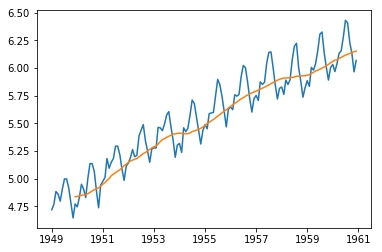

In [47]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg)

In [48]:
ts_moving_avg_diff = ts_log - moving_avg
ts_moving_avg_diff.head(15)

#Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01    -0.065494
1950-01-01    -0.093449
1950-02-01    -0.007566
1950-03-01     0.099416

In [49]:
ts_moving_avg_diff.dropna(inplace=True)

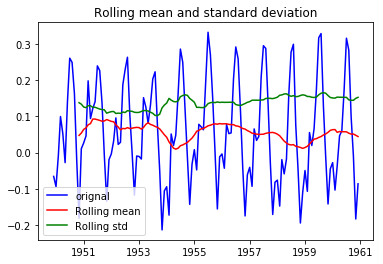

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical value (5%)             -2.886151
Critical value (1%)             -3.486535
Critical value (10%)            -2.579896
dtype: float64


In [53]:
test_stationary(ts_moving_avg_diff)

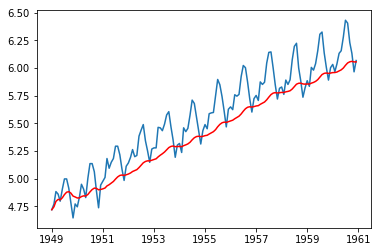

In [63]:
expweighted_avg = ts_log.ewm(halflife=12)
plt.plot(ts_log)
plt.plot(expweighted_avg.mean(), color='red')


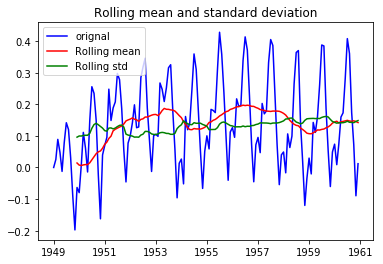

Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical value (5%)             -2.884042
Critical value (1%)             -3.481682
Critical value (10%)            -2.578770
dtype: float64


In [66]:
ts_log_weighted_avg = ts_log - expweighted_avg.mean()
ts_log_weighted_avg
test_stationary(ts_log_weighted_avg)

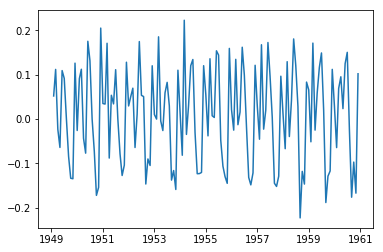

In [71]:
ts_log1_diff = ts_log- ts_log.shift()
plt.plot(ts_log1_diff)

In [72]:
ts_log1_diff.dropna(inplace=True)

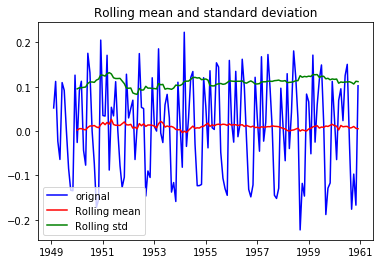

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical value (5%)             -2.884398
Critical value (1%)             -3.482501
Critical value (10%)            -2.578960
dtype: float64


In [73]:
test_stationary(ts_log1_diff)

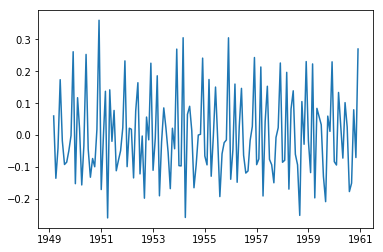

In [75]:
ts_log2_diff = ts_log1_diff - ts_log1_diff.shift()

In [76]:
ts_log2_diff.dropna(inplace=True)

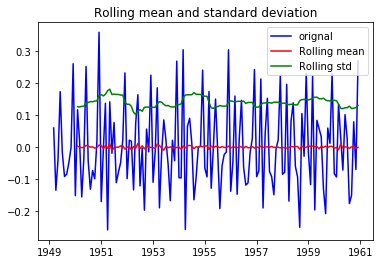

Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical value (5%)           -2.884398e+00
Critical value (1%)           -3.482501e+00
Critical value (10%)          -2.578960e+00
dtype: float64


In [77]:
test_stationary(ts_log2_diff)

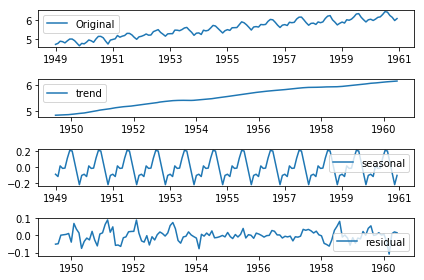

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal =  decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend()

plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend()

plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend()
plt.tight_layout()
plt.show()

In [98]:
ts_log_residual = residual
ts_log_residual.dropna(inplace=True)

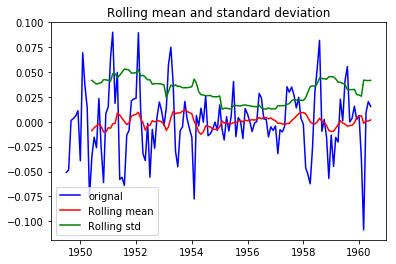

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical value (5%)           -2.885538e+00
Critical value (1%)           -3.485122e+00
Critical value (10%)          -2.579569e+00
dtype: float64


In [99]:
test_stationary(ts_log_residual)

In [100]:
from statsmodels.tsa.stattools import acf, pacf

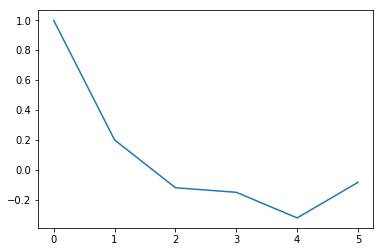

In [110]:
lag_acf = acf(ts_log1_diff,nlags=5)
plt.plot(lag_acf)

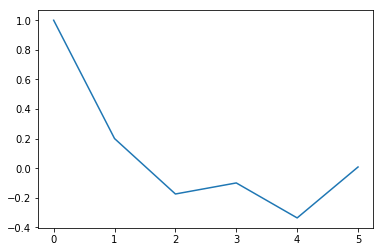

In [111]:
lag_pacf = pacf(ts_log1_diff,nlags=5,method='ols')
plt.plot(lag_pacf)

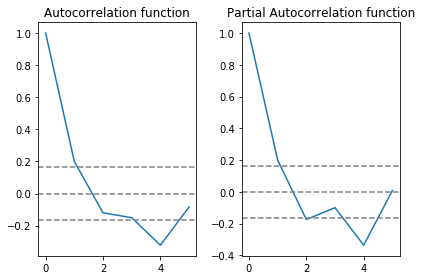

In [113]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(ts_log1_diff)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(ts_log1_diff)),linestyle='--',color='grey')
plt.title('Autocorrelation function')


plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(ts_log1_diff)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(ts_log1_diff)),linestyle='--',color='grey')
plt.title('Partial Autocorrelation function')

plt.tight_layout()

In [166]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

#Passengers    1.502303
dtype: float64

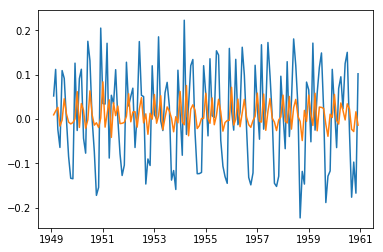

In [167]:
model = ARIMA(ts_log,order=(2,1,0))
result_AR = model.fit(disp=-1)
#result_AR.fittedvalues
plt.plot(ts_log1_diff)
plt.plot(result_AR.fittedvalues)
ARdf = pd.DataFrame(result_AR.fittedvalues, columns=['#Passengers'])

#RSS
p = (ARdf-ts_log1_diff)**2
p.sum()

#Passengers    1.47214
dtype: float64

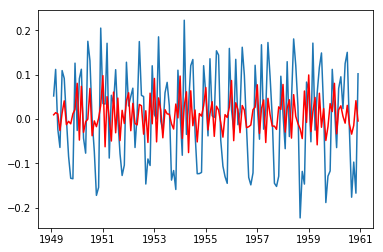

In [170]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log1_diff)
plt.plot(results_MA.fittedvalues, color='red')
MAdf = pd.DataFrame(results_MA.fittedvalues, columns=['#Passengers'])

#RSS
q = (MAdf-ts_log1_diff)**2
q.sum()

#Passengers    1.029152
dtype: float64

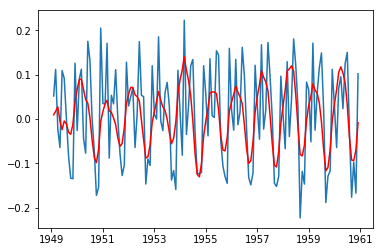

In [173]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log1_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
arima_res = pd.DataFrame(results_ARIMA.fittedvalues, columns=['#Passengers'])

#RSS
arima = (arima_res-ts_log1_diff)**2
arima.sum()

In [174]:
prediction_Arima = pd.Series(results_ARIMA.fittedvalues, copy=True)
prediction_Arima.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [176]:
predictions_ARIMA_diff_cumsum = prediction_Arima.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [201]:
#ts_log.ix[0] =4.718499
predictions_ARIMA_log = pd.Series(4.718499, index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
1949-06-01    4.744830
1949-07-01    4.740483
1949-08-01    4.729506
1949-09-01    4.699577
1949-10-01    4.665110
1949-11-01    4.653831
1949-12-01    4.691043
1950-01-01    4.759178
1950-02-01    4.848612
1950-03-01    4.938641
1950-04-01    5.004793
1950-05-01    5.048846
1950-06-01    5.084314
1950-07-01    5.087414
1950-08-01    5.040286
1950-09-01    4.953934
1950-10-01    4.855469
1950-11-01    4.787622
1950-12-01    4.782395
1951-01-01    4.799780
1951-02-01    4.833795
1951-03-01    4.876357
1951-04-01    4.895104
1951-05-01    4.910364
1951-06-01    4.912853
                ...   
1958-07-01    5.885055
1958-08-01    5.868589
1958-09-01    5.788748
1958-10-01    5.705605
1958-11-01    5.646735
1958-12-01    5.644073
1959-01-01    5.675272
1959-02-01    5.726717
1959-03-01    5.806523
1959-04-01    5.871857
1959-05-01    5.930047
1959-06-01    5.966122
1959-

In [7]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
# plt.plot(data)
# plt.plot(predictions_ARIMA)
predictions_ARIMA

NameError: name 'predictions_ARIMA_log' is not defined